<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/attcks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchattacks

     |████████████████████████████████| 105 kB 5.2 MB/s 


In [ ]:
import torchvision
model = torchvision.models.vgg19(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
import torchvision.transforms as transforms
pretrained_means = [0.485, 0.456, 0.406]
pretrained_stds = [0.229, 0.224, 0.225]
test_transforms = transforms.Compose([
                          # transforms.ToPILImage(),
                          transforms.ToTensor(),
                          transforms.Resize([224, 224])])
                          #  transforms.Normalize(mean=pretrained_means,
                                                # std=pretrained_stds)])
data = torchvision.datasets.ImageFolder("/content/drive/MyDrive/IMAGENET/", transform  =  test_transforms)

In [ ]:
import torchattacks, torch
atk = torchattacks.PGD(model,eps=.01, steps=4)
x, y = data[10]
print(x.shape, torch.LongTensor([y]))
x = torch.unsqueeze(x, dim=0)
adv_images = atk(x, torch.LongTensor([y]))

torch.Size([3, 224, 224]) tensor([0])


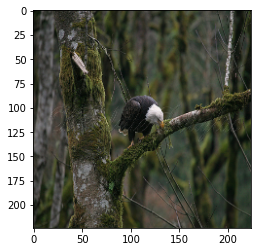

In [ ]:
plt.imshow(x[0].permute(1, 2, 0))

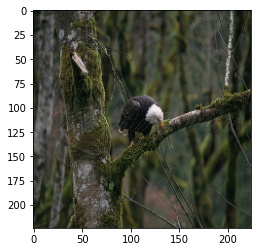

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(adv_images[0].permute(1, 2, 0))

In [ ]:
import torch.nn as nn
y = model(x)
y = nn.functional.softmax(y, dim=1) 
print(y.max(1))

y1 = model(adv_images)
y1 = nn.functional.softmax(y1, dim=1)
print(y1.max(1))

torch.return_types.max(
values=tensor([0.6593], grad_fn=<MaxBackward0>),
indices=tensor([815]))
torch.return_types.max(
values=tensor([0.9994], grad_fn=<MaxBackward0>),
indices=tensor([815]))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


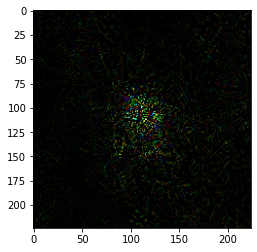

In [ ]:
 # Update adversarial images
adv = x.clone().detach()
adv.requires_grad = True
loss = nn.CrossEntropyLoss()
output = model(adv)
# cost = torch.FloatTensor([-82])
# cost.requires_grad=True
cost = loss(output, torch.LongTensor([82]) )
grad = torch.autograd.grad(cost, adv,
                            retain_graph=False, create_graph=False, allow_unused=True)
grad[0].shape
plt.imshow(grad[0][0].permute(1,2,0))
# adv_images = adv_images.detach() + self.alpha*grad.sign()
# delta = torch.clamp(adv_images - images, min=-self.eps, max=self.eps)
# adv_images = torch.clamp(images + delta, min=0, max=1).detach()